In [51]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier

In [22]:
df = pd.read_csv("HR_comma_sep.csv.xls")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Exploring the data, observing what seems to have the impact on which employee stays or leaves. 

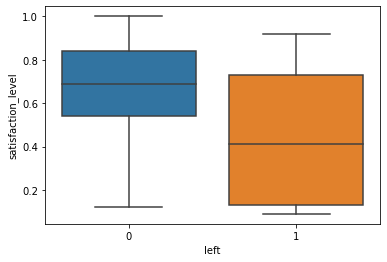

In [14]:
sns.boxplot(x="left", y= "satisfaction_level", data=df)
plt.show()

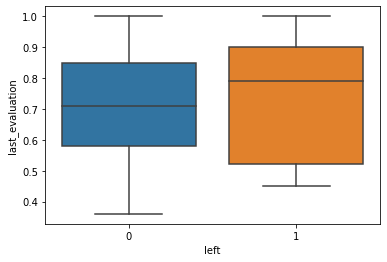

In [16]:
sns.boxplot(x="left", y= "last_evaluation", data=df)
plt.show()

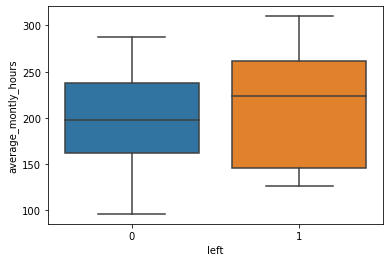

In [18]:
sns.boxplot(x="left", y= "average_montly_hours", data=df)
plt.show()

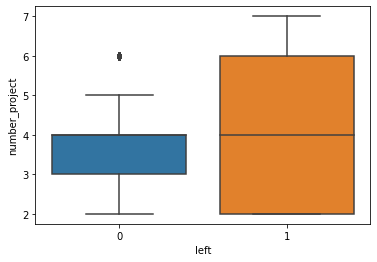

In [19]:
sns.boxplot(x="left", y= "number_project", data=df)
plt.show()

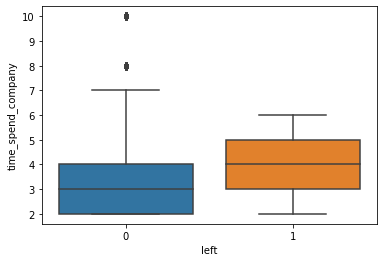

In [28]:
sns.boxplot(x="left", y="time_spend_company", data=df)
plt.show()

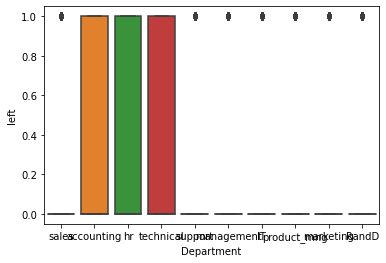

In [31]:
sns.boxplot(x="Department", y="left", data=df)
plt.show()

#### 2) Cleaning data. 

In [26]:
out_type = {'low': 0, 'medium': 1, 'high': 3}

df = df.replace({'salary': out_type})

#### 3) Create the target values, 'y', which is the 'left' column. Then split_train_test.

In [45]:
y = df["left"]
#dropping department too, as it will ruin the prediction model since it can so cleanly predict who leaves. 
columns = ['Department', 'left']
train_df = df.drop(columns, axis=1)
col = train_df.columns
X = train_df[col]
X
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [46]:
train_df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,0,0
1,0.80,0.86,5,262,6,0,0,1
2,0.11,0.88,7,272,4,0,0,1


#### Now to build the classifier model

In [41]:
my_d_tree = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 5, random_state = 1)
my_d_tree = my_d_tree.fit(X_train, y_train)

In [47]:
print(my_d_tree.feature_importances_) 
print(my_d_tree.score(X, y))

[0.52288637 0.15210645 0.10390722 0.07354844 0.14514482 0.0006097
 0.         0.001797  ]
0.9835989065937729


###### So it seems satisfaction level is by far the greatest indicator of who stays and leaves. Oddly enough, salary level is a very poor predicter. 

##### Predict the train data set

In [43]:
pred = my_d_tree.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
pred = my_d_tree.predict(X_test)
df_confusion = metrics.confusion_matrix(y_test, pred)
df_confusion
print(my_d_tree.score(X,y))

0.9835989065937729


#### Next, try this with RandomForestClassifier

In [52]:

# Building and fitting my_forest
forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)
my_forest = forest.fit(X_train, y_train)

# Print the score of the fitted random forest
print(my_forest.score(X, y))
print(my_d_tree.feature_importances_) 

0.9825988399226615
[0.52288637 0.15210645 0.10390722 0.07354844 0.14514482 0.0006097
 0.         0.001797  ]


###### RandomForestClassifier seems to match closely with the previous model. 
##### Next, plotting the confusion matrix

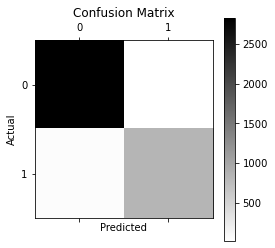

In [53]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

plot_confusion_matrix(df_confusion)

###### So we have a good model that has 98% accuracy in predicting if a person will leave an organization or not.